In [1]:
# Import basic libraries
import numpy as np 
import pandas as pd 

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('default_credit.xls')


In [3]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

# DATA PREPROCESSSING 

In [5]:
print('SEX ' + str(sorted(df['SEX'].unique())))
print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))
print('MARRIAGE ' + str(sorted(df['MARRIAGE'].unique())))
print('PAY_0 ' + str(sorted(df['PAY_0'].unique())))
print('default.payment.next.month ' + str(sorted(df['default payment next month'].unique())))

SEX [1, 2]
EDUCATION [0, 1, 2, 3, 4, 5, 6]
MARRIAGE [0, 1, 2, 3]
PAY_0 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
default.payment.next.month [0, 1]


In [6]:
fill = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)
df.loc[fill, 'EDUCATION'] = 4

print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))

EDUCATION [1, 2, 3, 4]


In [7]:
fill = (df.MARRIAGE == 0)
df.loc[fill, 'MARRIAGE'] = 2

print('MARRIAGE ' + str(sorted(df['MARRIAGE'].unique())))

MARRIAGE [1, 2, 3]


In [8]:
df = df.rename(columns={'default payment next month': 'DEFAULT', 
                        'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Excercise 6.1

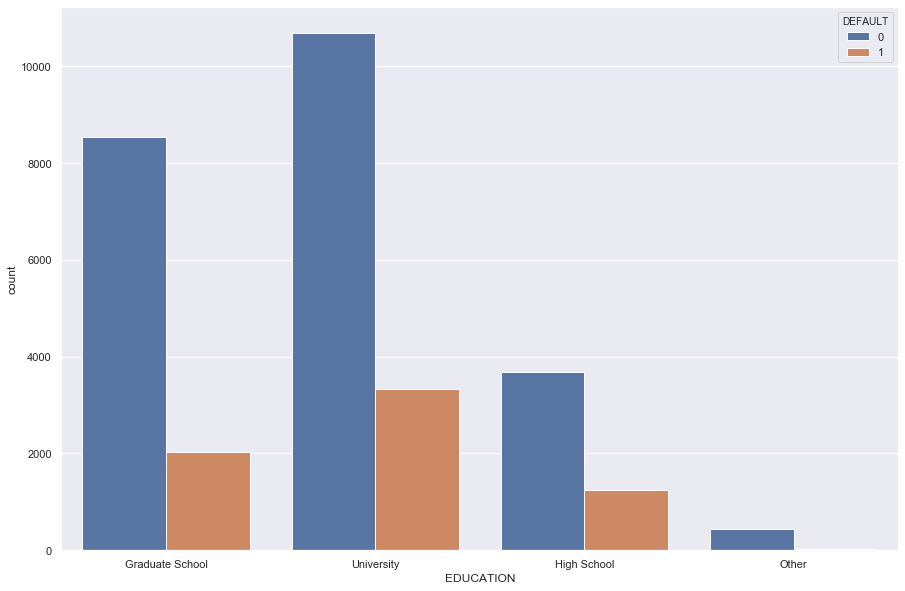

In [9]:
sns.set(rc={'figure.figsize':(15,10)})


edu = sns.countplot(x='EDUCATION', hue='DEFAULT', data=df)
edu.set_xticklabels(['Graduate School','University','High School','Other'])
plt.show()

In [10]:
pd.crosstab(df.EDUCATION,df.DEFAULT,normalize='index')

DEFAULT,0,1
EDUCATION,,
1,0.807652,0.192348
2,0.762651,0.237349
3,0.748424,0.251576
4,0.929487,0.070513


# Excercise 6.2

In [11]:
pd.crosstab(df.AGE,df.DEFAULT)

DEFAULT,0,1
AGE,,
21,53,14
22,391,169
23,684,247
24,827,300
25,884,302
26,1003,253
27,1164,313
28,1123,286
29,1292,313


In [12]:
pd.crosstab(df.AGE,df.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
AGE,,
21,0.791045,0.208955
22,0.698214,0.301786
23,0.734694,0.265306
24,0.733807,0.266193
25,0.745363,0.254637
26,0.798567,0.201433
27,0.788084,0.211916
28,0.797019,0.202981
29,0.804984,0.195016


# Activity 6.1

In [13]:
pd.crosstab(df.PAY_2,df.DEFAULT,margins=True)

DEFAULT,0,1,All
PAY_2,,,
-2,3091,691,3782
-1,5084,966,6050
0,13227,2503,15730
1,23,5,28
2,1743,2184,3927
3,125,201,326
4,49,50,99
5,10,15,25
6,3,9,12


In [14]:
pd.crosstab(df.PAY_3,df.DEFAULT,margins=True)

DEFAULT,0,1,All
PAY_3,,,
-2,3328,757,4085
-1,5012,926,5938
0,13013,2751,15764
1,3,1,4
2,1850,1969,3819
3,102,138,240
4,32,44,76
5,9,12,21
6,9,14,23


In [15]:
pd.crosstab(df.PAY_4,df.DEFAULT,margins=True)

DEFAULT,0,1,All
PAY_4,,,
-2,3511,837,4348
-1,4783,904,5687
0,13439,3016,16455
1,1,1,2
2,1506,1653,3159
3,70,110,180
4,23,46,69
5,17,18,35
6,3,2,5


In [16]:
pd.crosstab(df.PAY_5,df.DEFAULT,margins=True)

DEFAULT,0,1,All
PAY_5,,,
-2,3651,895,4546
-1,4642,897,5539
0,13752,3195,16947
2,1203,1423,2626
3,65,113,178
4,33,51,84
5,7,10,17
6,1,3,4
7,10,48,58


In [17]:
pd.crosstab(df.PAY_6,df.DEFAULT,margins=True)

DEFAULT,0,1,All
PAY_6,,,
-2,3914,981,4895
-1,4765,975,5740
0,13217,3069,16286
2,1365,1401,2766
3,66,118,184
4,18,31,49
5,6,7,13
6,5,14,19
7,8,38,46
